In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from dataset.daily_new_users import (monthly_growth,    # dataset.utils
                                     monthly_users,     # dataset.utils
                                     add_date_column,   # Date
                                     new_users_per_day, # dataset.utils 
                                     bdays_in_period,   # Date
                                     conc_days_users,   # Utils
                                     dataset_1_v1,      # Dataset.paid.v1
                                     get_firstname,     # People
                                     get_lastname,      # People
                                     full_name_date,    # Dataset
                                     siren_company_email_plan_payment,
                                     price_per_plan,
                                     get_friday
                                    )


In [3]:
YEARS = [ (120, 65, 35, 24), (45, 35, 36, 23), (27, 14, 7, 3)]

In [4]:
growth_per_month = monthly_growth()
users_per_month = monthly_users(growth_per_month)
users_per_month.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers
0,month_1,0.400000,45,45
1,month_2,0.400000,63,18
2,month_3,0.400000,88,25
3,month_4,0.216667,123,35
4,month_5,0.216667,149,26


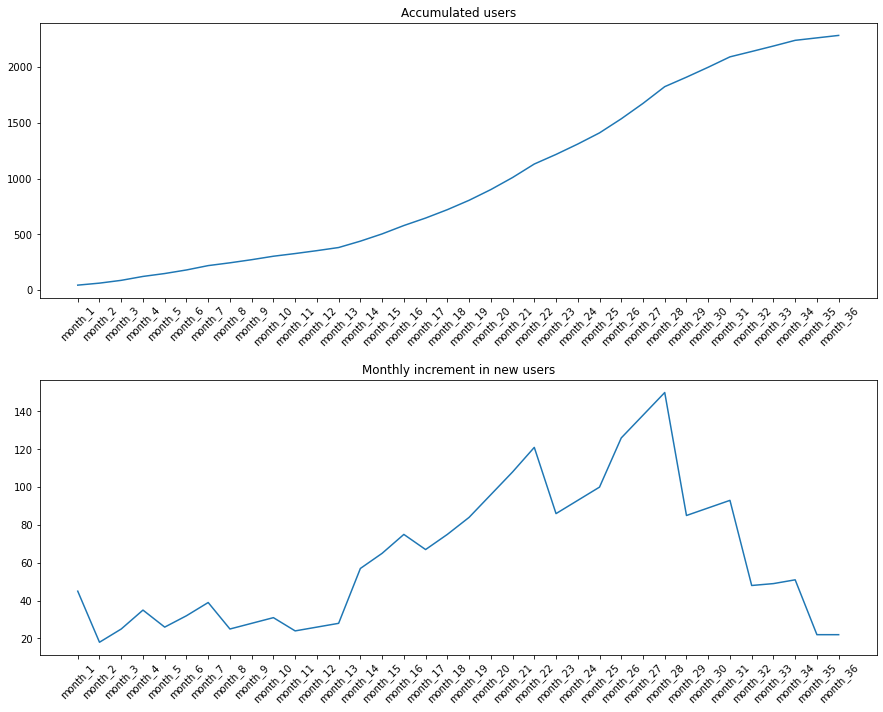

In [5]:
plt.rcParams["figure.figsize"] = (15,9)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(users_per_month["Month"], users_per_month["TotalUsers"])
ax1.tick_params('x', labelrotation=45)
ax2.tick_params('x', labelrotation=45)
ax1.set_title("Accumulated users")
ax2.plot(users_per_month["Month"], users_per_month["NewUsers"])
ax2.set_title("Monthly increment in new users")
plt.subplots_adjust(top=1.1, 
                    hspace=0.3)
plt.show()

In [6]:
with_day = add_date_column(users_per_month)
with_day.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers,Date
0,month_1,0.400000,45,45,2018-07-01
1,month_2,0.400000,63,18,2018-08-01
2,month_3,0.400000,88,25,2018-09-01
3,month_4,0.216667,123,35,2018-10-01
4,month_5,0.216667,149,26,2018-11-01


In [7]:
users_per_day = new_users_per_day(with_day)
users_per_day[:5]

[3, 1, 3, 3, 2]

In [8]:
list_of_bdays = bdays_in_period(with_day)
list_of_bdays[:5]

[Timestamp('2018-07-02 00:00:00', freq='B'),
 Timestamp('2018-07-03 00:00:00', freq='B'),
 Timestamp('2018-07-04 00:00:00', freq='B'),
 Timestamp('2018-07-05 00:00:00', freq='B'),
 Timestamp('2018-07-06 00:00:00', freq='B')]

In [9]:
users_dataset = conc_days_users(list_of_bdays, users_per_day)
users_dataset.head(10)

,Date,NewDailyUsers
0,2018-07-02,3
1,2018-07-03,1
2,2018-07-04,3
3,2018-07-05,3
4,2018-07-06,2
5,2018-07-09,1
6,2018-07-10,3
7,2018-07-11,3
8,2018-07-12,1
9,2018-07-13,2


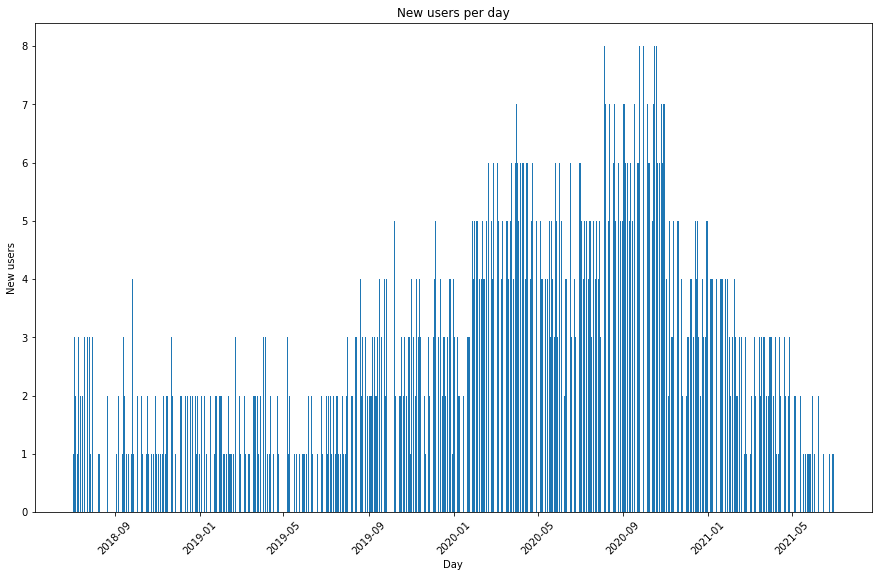

In [10]:
plt.bar(users_dataset["Date"], users_dataset["NewDailyUsers"])
plt.title('New users per day')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.ylabel('New users')
plt.show()

In [11]:
first_dataset = dataset_1_v1(users_dataset)

In [12]:
list(first_dataset.items())[25:50]

[('user_25', '18/07/2018'),
 ('user_26', '19/07/2018'),
 ('user_27', '19/07/2018'),
 ('user_28', '19/07/2018'),
 ('user_29', '23/07/2018'),
 ('user_30', '23/07/2018'),
 ('user_31', '23/07/2018'),
 ('user_32', '24/07/2018'),
 ('user_33', '24/07/2018'),
 ('user_34', '24/07/2018'),
 ('user_35', '25/07/2018'),
 ('user_36', '25/07/2018'),
 ('user_37', '26/07/2018'),
 ('user_38', '26/07/2018'),
 ('user_39', '26/07/2018'),
 ('user_40', '27/07/2018'),
 ('user_41', '30/07/2018'),
 ('user_42', '30/07/2018'),
 ('user_43', '30/07/2018'),
 ('user_44', '31/07/2018'),
 ('user_45', '31/07/2018'),
 ('user_46', '31/07/2018'),
 ('user_47', '03/08/2018'),
 ('user_48', '08/08/2018'),
 ('user_49', '09/08/2018')]

In [13]:
first_name_dataset = get_firstname("../data/nat2020.csv", first_dataset)

In [14]:
first_name_dataset[:20]

['MARIE-JOSEE',
 'ARTHUR',
 'AXEL',
 'NICOLAS',
 'LAURENT',
 'CAROLINE',
 'VICENTE',
 'SANDRINE',
 'PEGGY',
 'CHRISTOPHE',
 'CLÉMENCE',
 'BERNARD',
 'FLORIAN',
 'PASCAL',
 'DELPHINE',
 'JULIEN',
 'MARYLENE',
 'GHISLAIN',
 'FRANCIS',
 'PAUL']

In [15]:
full_name = get_lastname("../data/noms2008nat_txt.txt", first_name_dataset)

In [16]:
full_name.head(20)

,FirstName,LastName
0,MARIE-JOSEE,NAGOU
1,ARTHUR,LEMAIRE
2,AXEL,GUIOT
3,NICOLAS,PATINIER
4,LAURENT,PELLETIER
5,CAROLINE,MARQUET
6,VICENTE,ARTAXET
7,SANDRINE,MASTIO
8,PEGGY,GOURMAUD
9,CHRISTOPHE,FERNANDEZ


In [17]:
dataset_v1 = full_name_date(full_name, first_dataset)

In [18]:
dataset_v1[20:40]

,FirstName,LastName,Date
20,MARJORIE,OLIVE,13/07/2018
21,MOUSSA,CRAISSAC,13/07/2018
22,KARINE,COURTOIS,16/07/2018
23,YANN,COLLART,16/07/2018
24,PIERRE-EMILIEN,VAULEON,18/07/2018
25,ISABELLE,GILOUPPE,18/07/2018
26,BERNARD,PAULIN,19/07/2018
27,ALAIN,KHABET,19/07/2018
28,ANNE-SOPHIE,LE BOULCH,19/07/2018
29,CEDRIC,ESSLINGER,23/07/2018


In [19]:
df = siren_company_email_plan_payment(dataset_v1)

In [20]:
df

,FirstName,LastName,Date,Company,SIREN,email,plan,payment
0,MARIE-JOSEE,NAGOU,02/07/2018,company_0,762892936,m.nagou@company_0.com,enterprise,card
1,ARTHUR,LEMAIRE,02/07/2018,company_1,581465173,a.lemaire@company_1.com,startup,card
2,AXEL,GUIOT,02/07/2018,company_2,195232776,a.guiot@company_2.com,startup,card
3,NICOLAS,PATINIER,03/07/2018,company_3,826597316,n.patinier@company_3.com,startup,card
4,LAURENT,PELLETIER,04/07/2018,company_4,154196588,l.pelletier@company_4.com,startup,bank
...,...,...,...,...,...,...,...,...
2264,FRANCK,ROBERT,24/06/2021,company_2264,191951693,f.robert@company_2264.com,enterprise,stripe
2265,SYLVIE,ROBIN,25/06/2021,company_2265,627538555,s.robin@company_2265.com,startup,card
2266,ELODIE,JUHEL,28/06/2021,company_2266,854219752,e.juhel@company_2266.com,startup,stripe
2267,RODOLPHE,BARRAUD,29/06/2021,company_2267,196688465,r.barraud@company_2267.com,pro,card


In [21]:
df_2 = price_per_plan(df)

In [22]:
df_2

,FirstName,LastName,Date,Company,SIREN,email,plan,payment,price
0,MARIE-JOSEE,NAGOU,2018-07-02,company_0,762892936,m.nagou@company_0.com,enterprise,card,600.0
1,ARTHUR,LEMAIRE,2018-07-02,company_1,581465173,a.lemaire@company_1.com,startup,card,50.0
2,AXEL,GUIOT,2018-07-02,company_2,195232776,a.guiot@company_2.com,startup,card,50.0
3,NICOLAS,PATINIER,2018-07-03,company_3,826597316,n.patinier@company_3.com,startup,card,50.0
4,LAURENT,PELLETIER,2018-07-04,company_4,154196588,l.pelletier@company_4.com,startup,bank,50.0
...,...,...,...,...,...,...,...,...,...
2264,FRANCK,ROBERT,2021-06-24,company_2264,191951693,f.robert@company_2264.com,enterprise,stripe,900.0
2265,SYLVIE,ROBIN,2021-06-25,company_2265,627538555,s.robin@company_2265.com,startup,card,180.0
2266,ELODIE,JUHEL,2021-06-28,company_2266,854219752,e.juhel@company_2266.com,startup,stripe,180.0
2267,RODOLPHE,BARRAUD,2021-06-29,company_2267,196688465,r.barraud@company_2267.com,pro,card,450.0


In [23]:
df_final = get_friday(df_2)

In [24]:
df_final.sample(20)

,FirstName,LastName,Date,Company,SIREN,email,plan,payment,price,Date Added
1966,JOHAN,MEURISSE,2020-12-25,company_1966,689789114,j.meurisse@company_1966.com,startup,card,180.0,2020-12-25
357,YOHAN,THOMAS,2019-07-12,company_357,569127561,y.thomas@company_357.com,startup,card,50.0,2019-07-12
2016,VÉRONIQUE,DOUMBIA,2021-01-12,company_2016,564633415,v.doumbia@company_2016.com,startup,card,180.0,2021-01-15
1388,DAMIEN,JANVIER,2020-07-30,company_1388,892156645,d.janvier@company_1388.com,enterprise,card,900.0,2020-07-31
1769,MAIWENN,DROUET,2020-10-21,company_1769,163135173,m.drouet@company_1769.com,enterprise,stripe,900.0,2020-10-23
1136,ARNAUD,DUPERON,2020-05-11,company_1136,946847471,a.duperon@company_1136.com,pro,card,250.0,2020-05-15
1302,VANESSA,GLIERE,2020-07-03,company_1302,763524178,v.gliere@company_1302.com,startup,stripe,180.0,2020-07-03
823,DAVID,BURGAT,2020-02-17,company_823,166368425,d.burgat@company_823.com,startup,card,85.0,2020-02-21
463,NORDINE,FENEON,2019-09-16,company_463,585563545,n.feneon@company_463.com,startup,stripe,85.0,2019-09-20
325,EMANUELLE,CROUTSCH,2019-06-06,company_325,873379544,e.croutsch@company_325.com,startup,bank,50.0,2019-06-07


In [25]:
df_final.to_csv("../data/users_dataset.csv", encoding='iso-8859-1')